In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = 'GlobalWeatherRepository.csv'
#df = pd.read_csv(file_path)

# Filter for rows where the 'country' column is 'Indonesia'
#filtered_df = df[df['country'] == 'Brazil']

# Save the filtered dataset to a new CSV file
#output_path = 'Brazil.csv'
#filtered_df.to_csv(output_path, index=False)

#print(f"Filtered dataset saved to {output_path}")


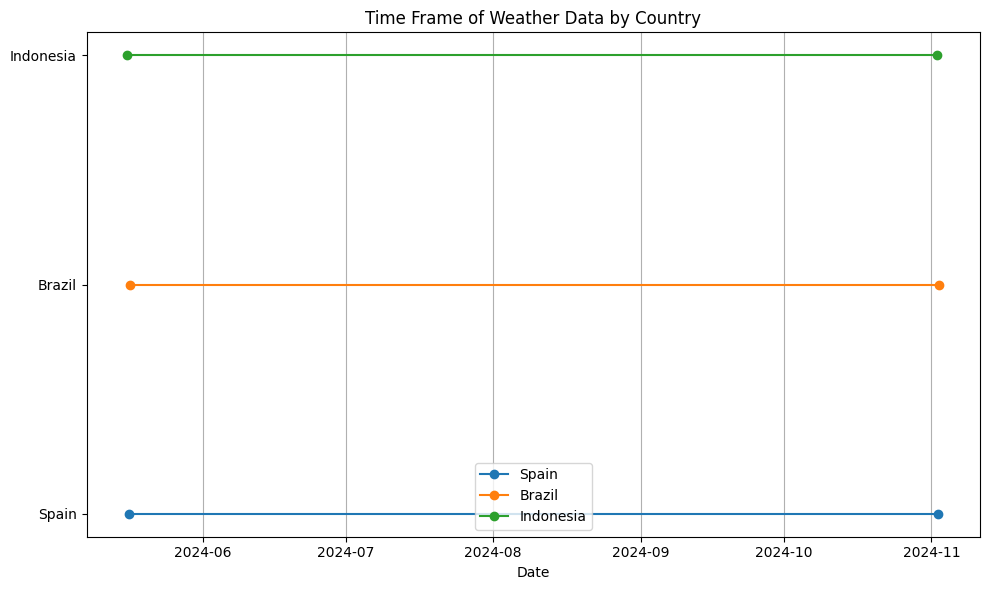

In [3]:
# Load the datasets
spain_df = pd.read_csv('Spain.csv')
brazil_df = pd.read_csv('Indonesia.csv')
indonesia_df = pd.read_csv('Brazil.csv')

# Convert the 'last_updated' column to datetime for each dataset
spain_df['last_updated'] = pd.to_datetime(spain_df['last_updated'])
brazil_df['last_updated'] = pd.to_datetime(brazil_df['last_updated'])
indonesia_df['last_updated'] = pd.to_datetime(indonesia_df['last_updated'])

# Find the min and max dates for each country
time_ranges = {
    'Country': ['Spain', 'Brazil', 'Indonesia'],
    'Start Date': [
        spain_df['last_updated'].min(),
        brazil_df['last_updated'].min(),
        indonesia_df['last_updated'].min()
    ],
    'End Date': [
        spain_df['last_updated'].max(),
        brazil_df['last_updated'].max(),
        indonesia_df['last_updated'].max()
    ]
}

# Create a DataFrame for visualization
time_ranges_df = pd.DataFrame(time_ranges)

# Plotting
plt.figure(figsize=(10, 6))
for i, row in time_ranges_df.iterrows():
    plt.plot(
        [row['Start Date'], row['End Date']],
        [i, i],
        marker='o',
        label=row['Country']
    )

# Customize the plot
plt.yticks(range(len(time_ranges_df)), time_ranges_df['Country'])
plt.xlabel('Date')
plt.title('Time Frame of Weather Data by Country')
plt.grid(axis='x')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

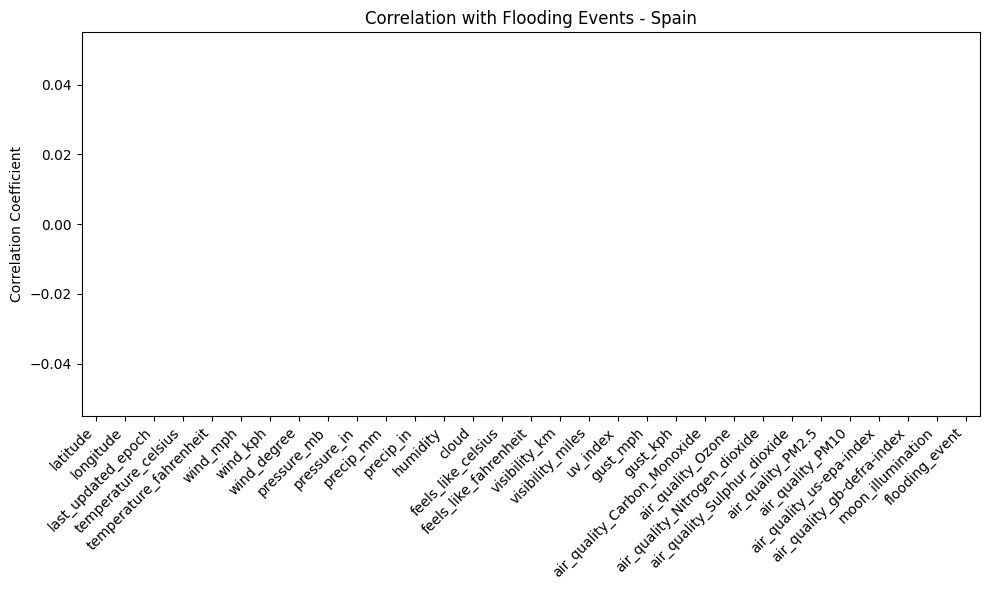

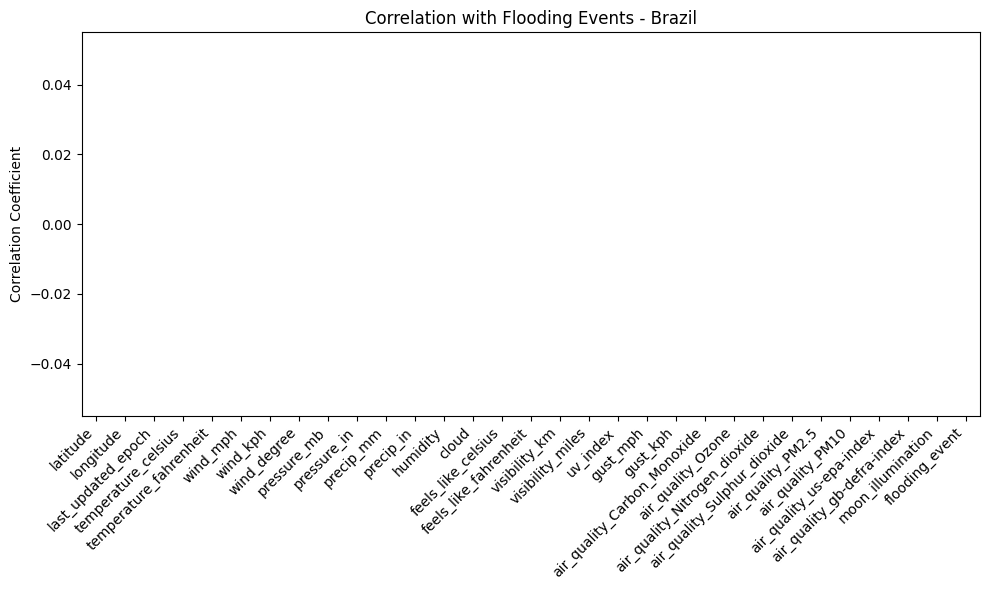

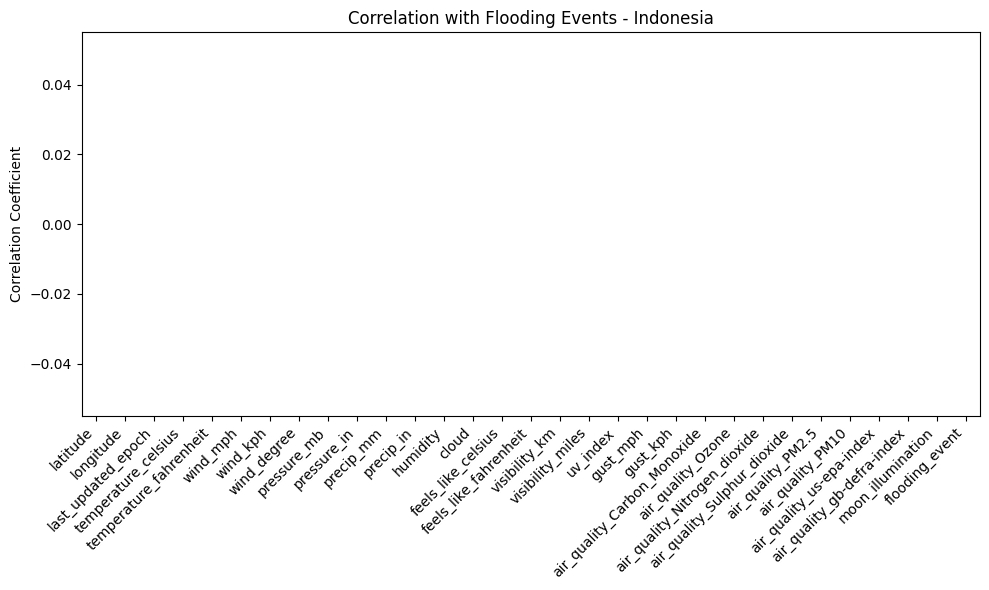

In [4]:
# Function to process each country's data
def process_country_data(df, country_name):
    # Convert 'last_updated' to datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    
    # Define flooding conditions (customize thresholds as needed)
    flooding_threshold = 15  # Example: 50 mm precipitation
    df['flooding_event'] = (df['precip_mm'] >= flooding_threshold).astype(int)
    
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_cols].corr()
    
    # Get correlations with flooding_event
    flooding_corr = correlation_matrix['flooding_event'].sort_values(ascending=False)
    
    # Plot correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=flooding_corr.index, y=flooding_corr.values)
    plt.title(f'Correlation with Flooding Events - {country_name}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    # Return processed DataFrame and correlations
    return df, flooding_corr

# Process data for each country
spain_df, spain_corr = process_country_data(spain_df, 'Spain')
brazil_df, brazil_corr = process_country_data(brazil_df, 'Brazil')
indonesia_df, indonesia_corr = process_country_data(indonesia_df, 'Indonesia')


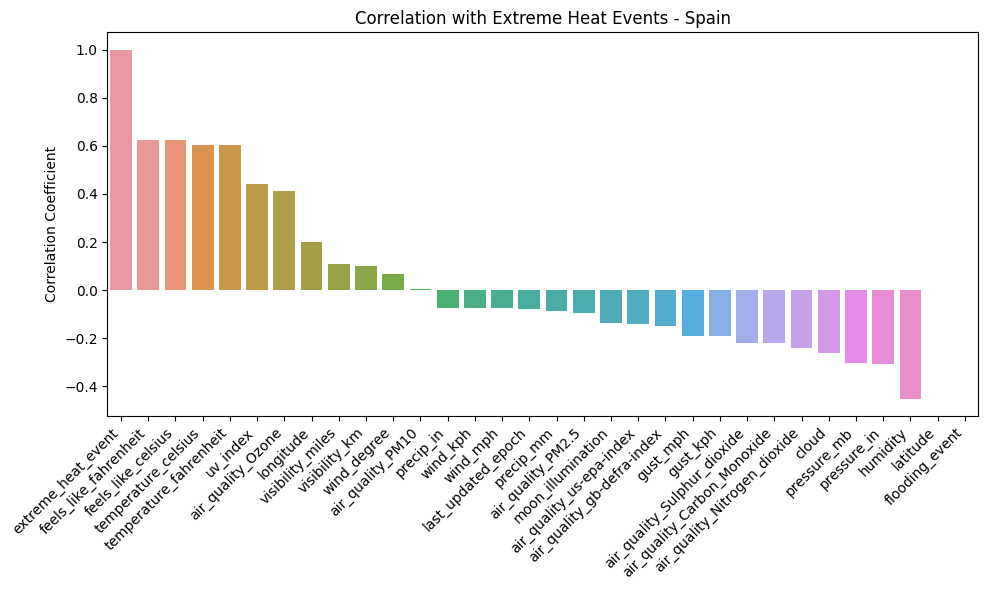

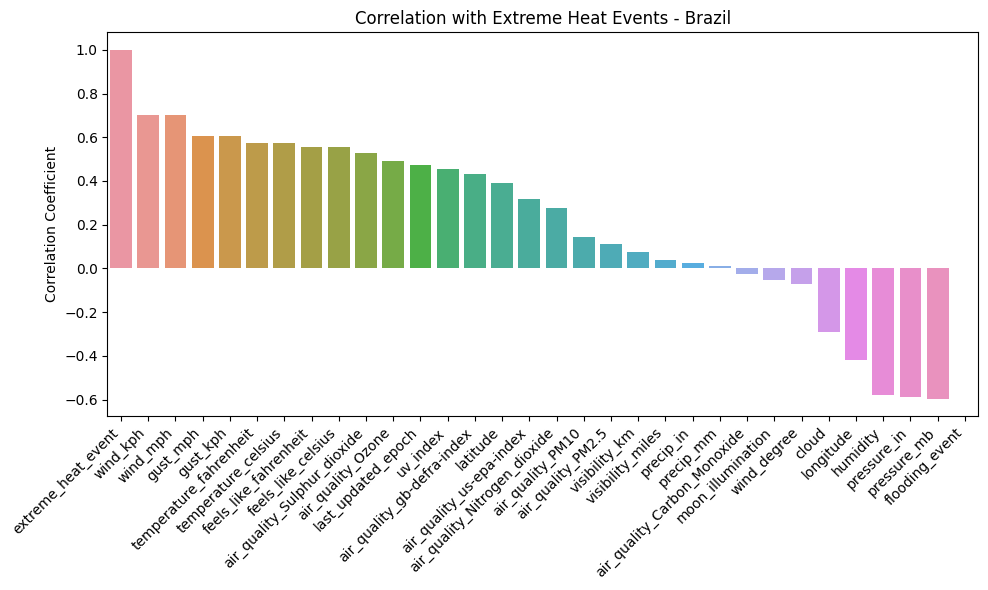

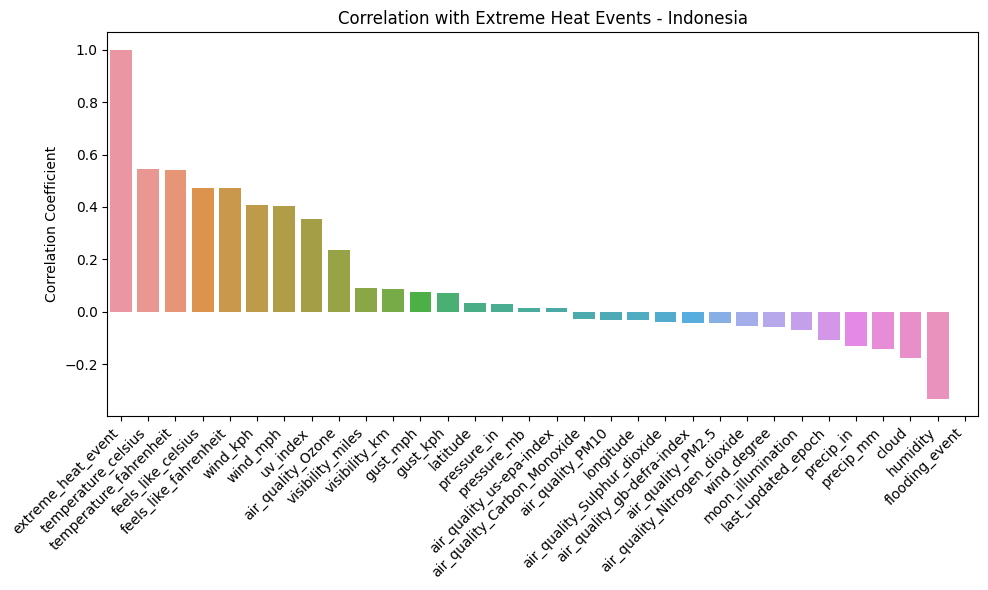

In [5]:
# Function to process each country's data
def process_heatwave_data(df, country_name):
    # Convert 'last_updated' to datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    
    # Calculate the 90th percentile temperature threshold
    heat_threshold = df['temperature_celsius'].quantile(0.85)
    
    # Define extreme heat events
    df['extreme_heat_event'] = (df['temperature_celsius'] >= heat_threshold).astype(int)
    
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_cols].corr()
    
    # Get correlations with extreme_heat_event
    heat_corr = correlation_matrix['extreme_heat_event'].sort_values(ascending=False)
    
    # Plot correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=heat_corr.index, y=heat_corr.values)
    plt.title(f'Correlation with Extreme Heat Events - {country_name}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    # Return processed DataFrame and correlations
    return df, heat_corr

# Process data for each country
spain_df, spain_corr = process_heatwave_data(spain_df, 'Spain')
brazil_df, brazil_corr = process_heatwave_data(brazil_df, 'Brazil')
indonesia_df, indonesia_corr = process_heatwave_data(indonesia_df, 'Indonesia')


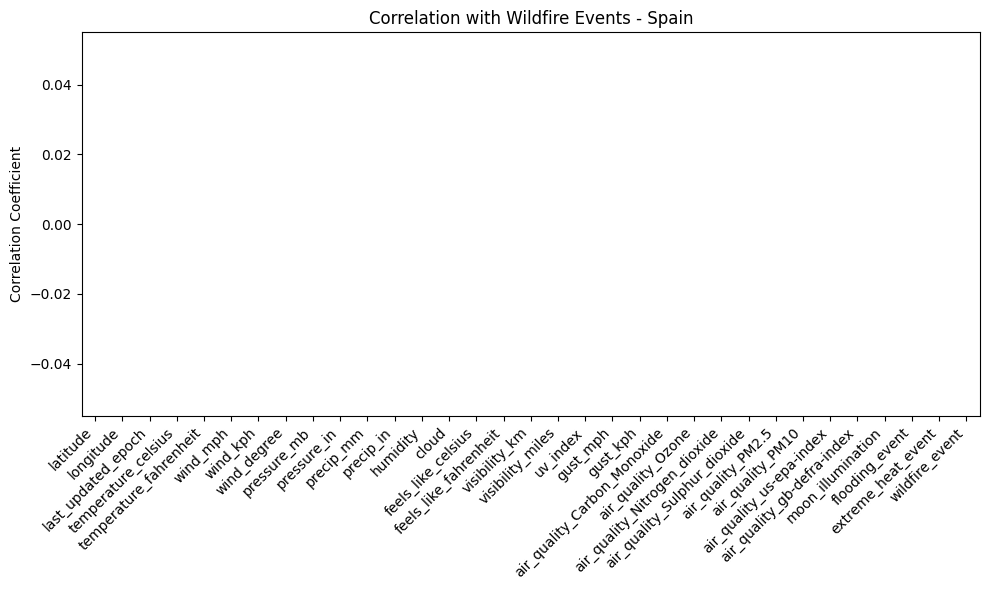

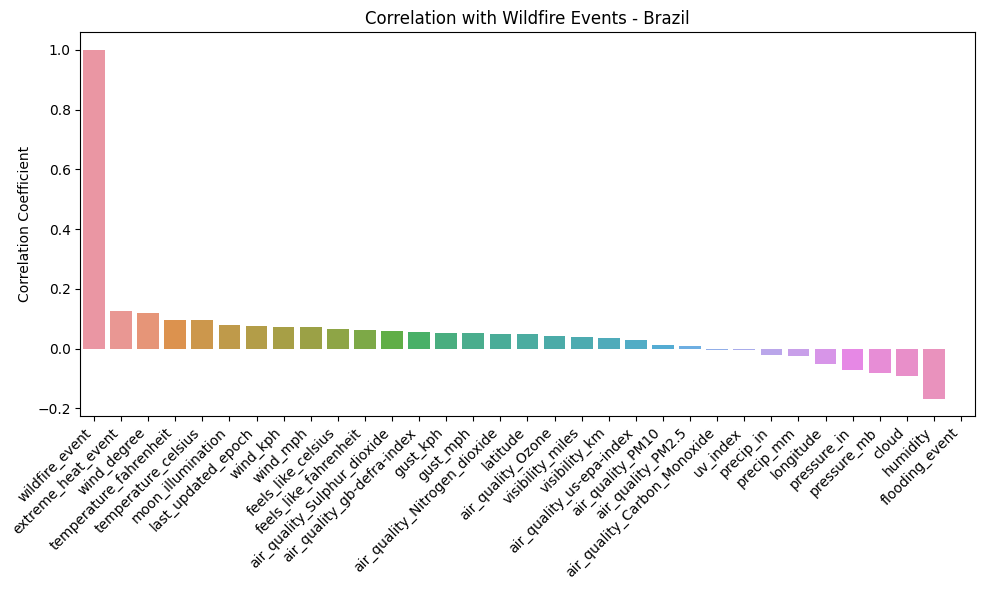

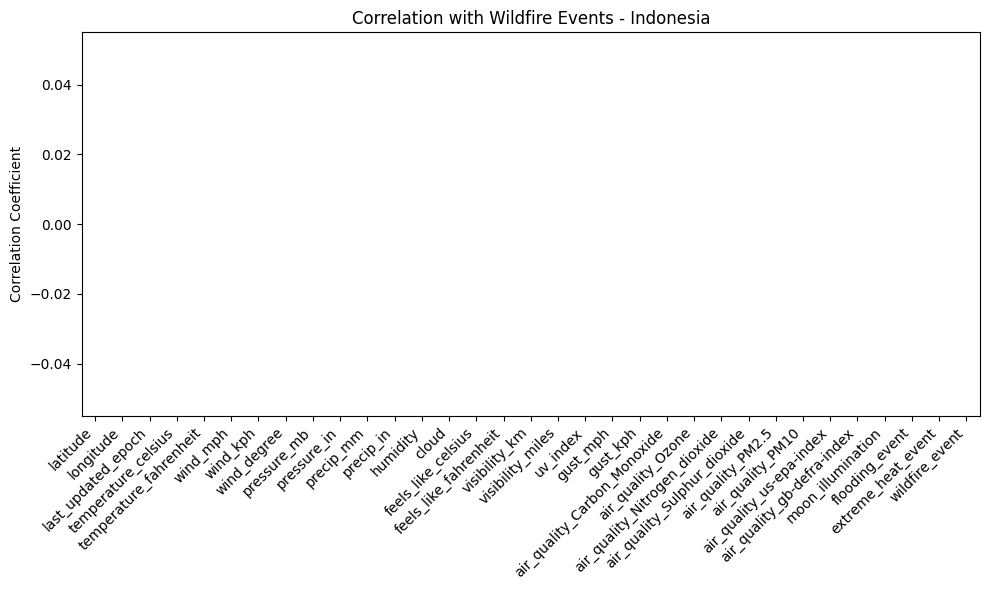

In [6]:
def process_wildfire_data(df, country_name):
    # Convert 'last_updated' to datetime
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    
    # Define thresholds for wildfire conditions
    pm_threshold = 40  # PM2.5 threshold for poor air quality
    wind_threshold = 15  # Wind speed (km/h) for fire spread
    humidity_threshold = 40  # Low humidity threshold (%)
    
    # Create wildfire event flag
    df['wildfire_event'] = (
        (df['air_quality_PM2.5'] >= pm_threshold) &
        (df['wind_kph'] >= wind_threshold) &
        (df['humidity'] <= humidity_threshold)
    ).astype(int)
    
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_cols].corr()
    
    # Get correlations with wildfire_event
    wildfire_corr = correlation_matrix['wildfire_event'].sort_values(ascending=False)
    
    # Plot correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=wildfire_corr.index, y=wildfire_corr.values)
    plt.title(f'Correlation with Wildfire Events - {country_name}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    # Return processed DataFrame and correlations
    return df, wildfire_corr

# Process data for each country
spain_df, spain_wildfire_corr = process_wildfire_data(spain_df, 'Spain')
brazil_df, brazil_wildfire_corr = process_wildfire_data(brazil_df, 'Brazil')
indonesia_df, indonesia_wildfire_corr = process_wildfire_data(indonesia_df, 'Indonesia')


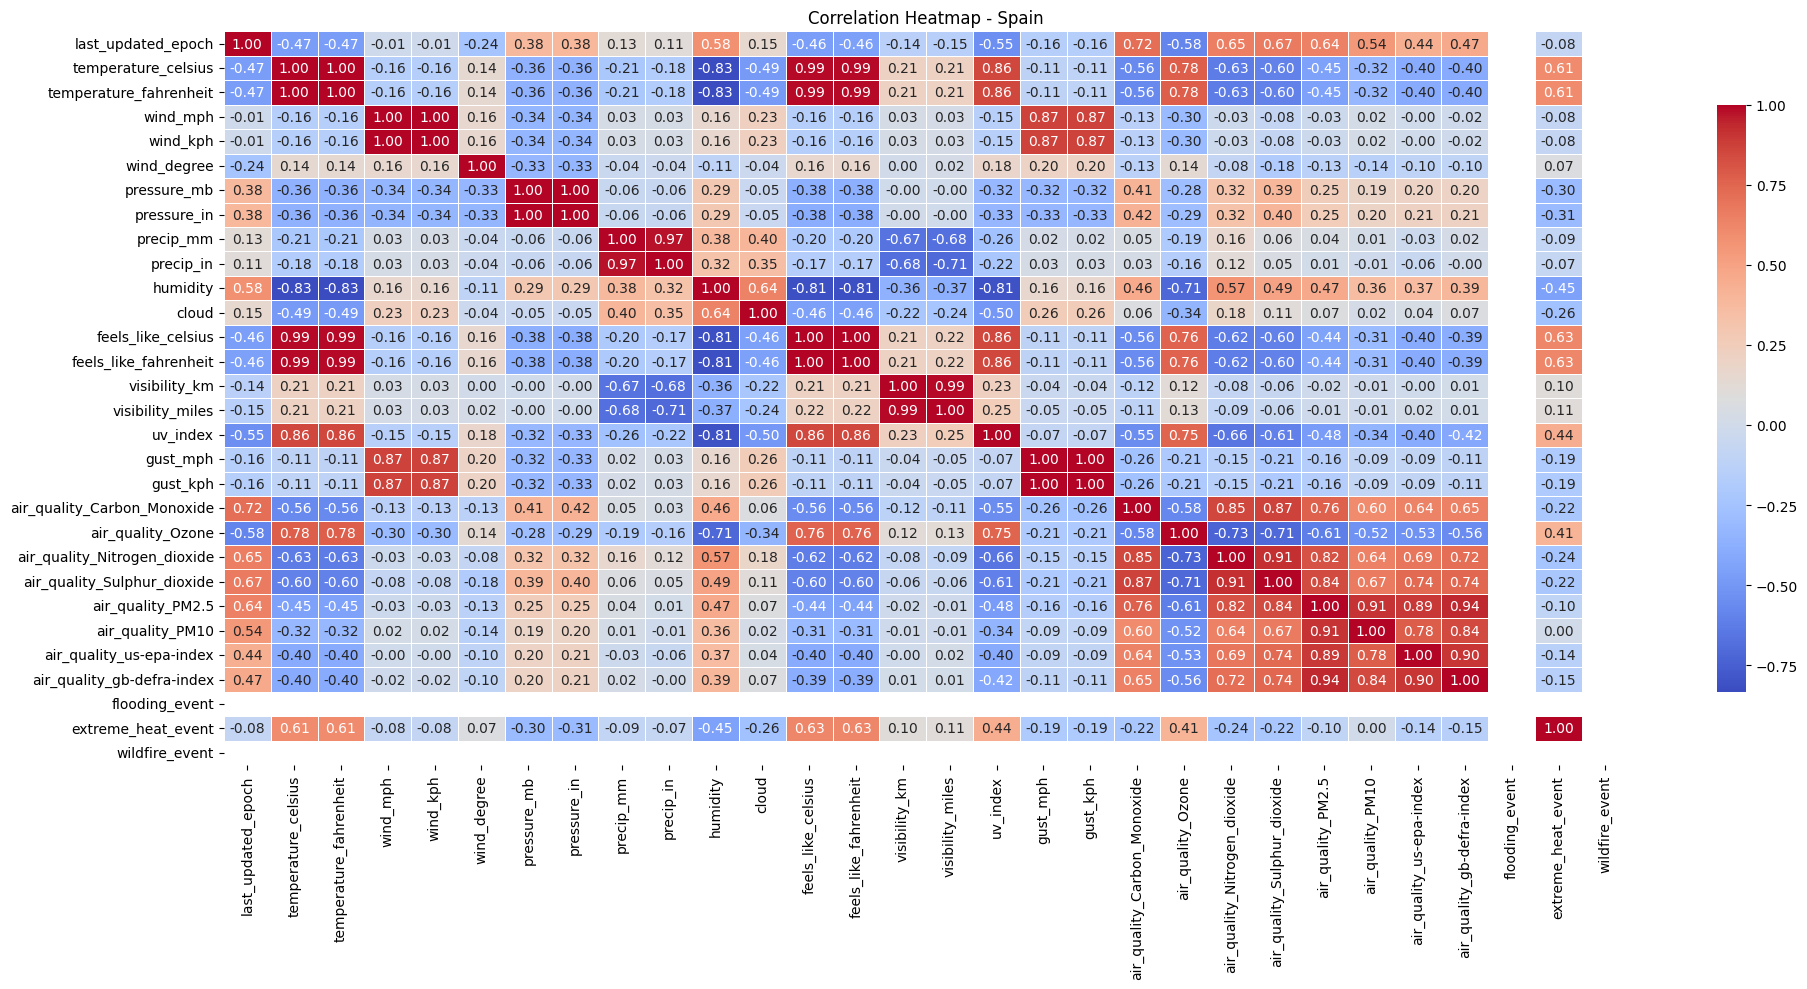

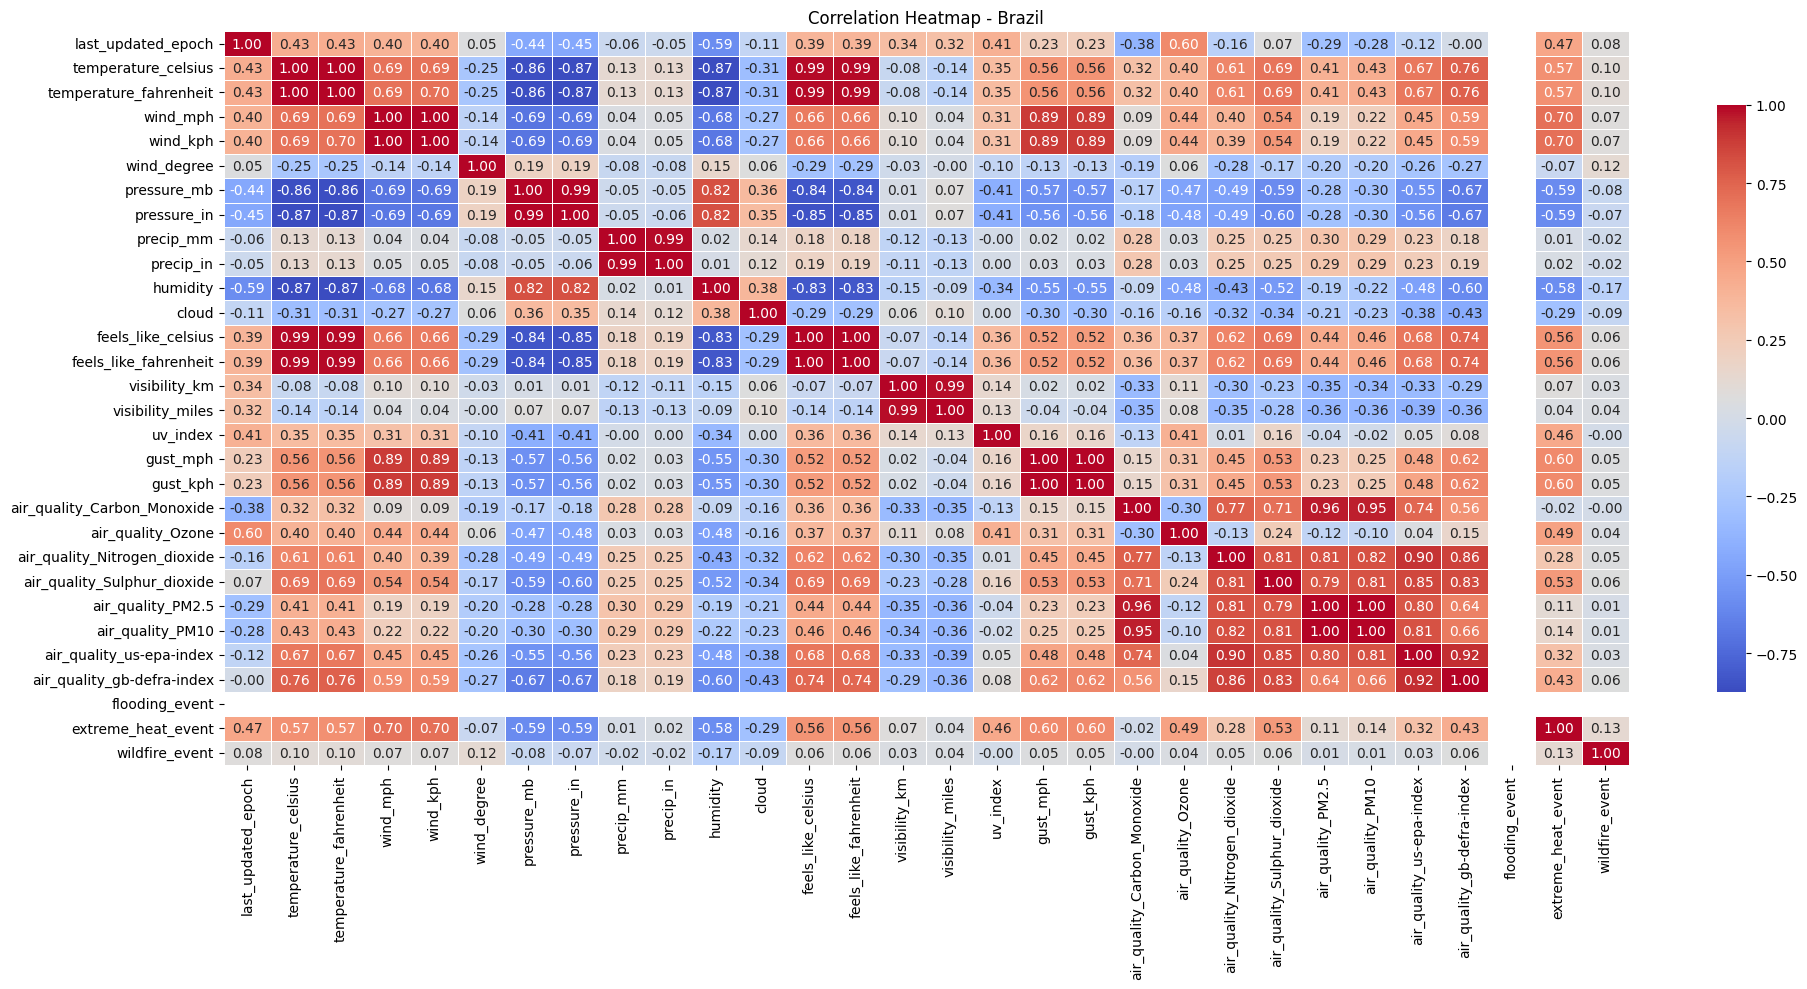

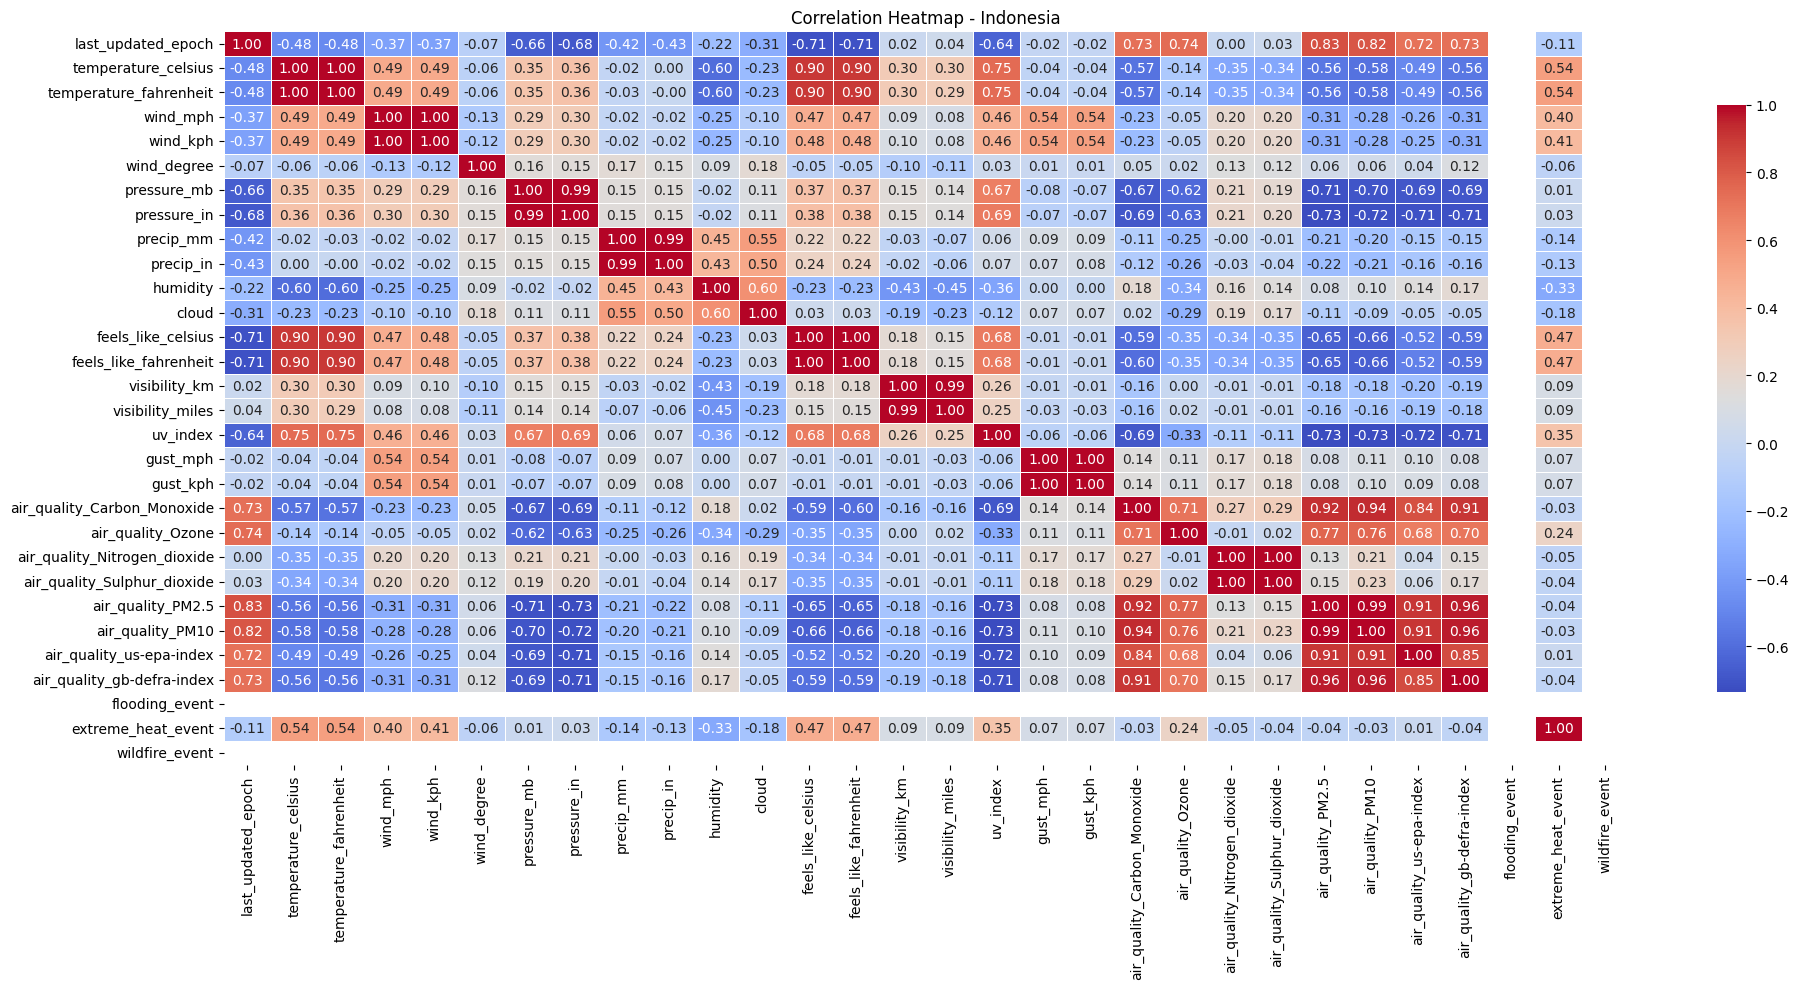

In [7]:
# Columns to exclude from the correlation analysis
exclude_columns = [
    'latitude', 'longitude', 'feels_like_Fahrenheit', 'feels_like_Celsius', 
    'moon_illumination', 'condition_text', 'location_name', 
    'country', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 
    'timezone'
]

# Function to generate correlation heatmap for each country
def plot_correlation_heatmap(df, country_name):
    # Convert 'last_updated' to datetime and drop non-numeric columns for correlation
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    
    # Drop the specified columns
    df_filtered = df.drop(columns=exclude_columns, errors='ignore')
    
    # Select only numeric columns
    df_numeric = df_filtered.select_dtypes(include=['number']).dropna(axis=1)  # Remove columns with NaN values
    
    # Compute the correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Create a heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
    plt.title(f'Correlation Heatmap - {country_name}')
    plt.tight_layout()
    plt.show()

# Generate heatmaps for each country
plot_correlation_heatmap(spain_df, 'Spain')
plot_correlation_heatmap(brazil_df, 'Brazil')
plot_correlation_heatmap(indonesia_df, 'Indonesia')


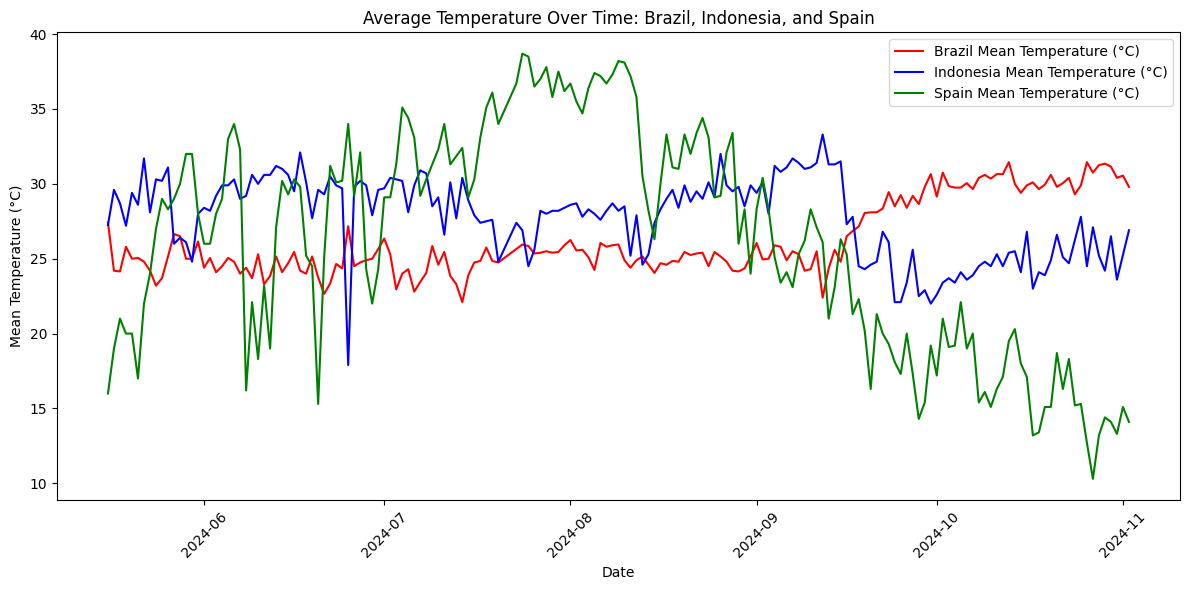

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'last_updated' is in datetime format for all three countries
brazil_df['last_updated'] = pd.to_datetime(brazil_df['last_updated'])
indonesia_df['last_updated'] = pd.to_datetime(indonesia_df['last_updated'])
spain_df['last_updated'] = pd.to_datetime(spain_df['last_updated'])

# Extract the date (ignoring the time) for all three DataFrames
brazil_df['date'] = brazil_df['last_updated'].dt.date
indonesia_df['date'] = indonesia_df['last_updated'].dt.date
spain_df['date'] = spain_df['last_updated'].dt.date

# Group by the date and calculate the mean temperature for each day for Brazil
daily_avg_temp_brazil = brazil_df.groupby('date')['temperature_celsius'].mean().reset_index()

# Group by the date and calculate the mean temperature for each day for Indonesia
daily_avg_temp_indonesia = indonesia_df.groupby('date')['temperature_celsius'].mean().reset_index()

# Group by the date and calculate the mean temperature for each day for Spain
daily_avg_temp_spain = spain_df.groupby('date')['temperature_celsius'].mean().reset_index()

# Plot the mean temperature for all three countries over time
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_temp_brazil['date'], daily_avg_temp_brazil['temperature_celsius'], label='Brazil Mean Temperature (°C)', color='red')
plt.plot(daily_avg_temp_indonesia['date'], daily_avg_temp_indonesia['temperature_celsius'], label='Indonesia Mean Temperature (°C)', color='blue')
plt.plot(daily_avg_temp_spain['date'], daily_avg_temp_spain['temperature_celsius'], label='Spain Mean Temperature (°C)', color='green')

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Average Temperature Over Time: Brazil, Indonesia, and Spain')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


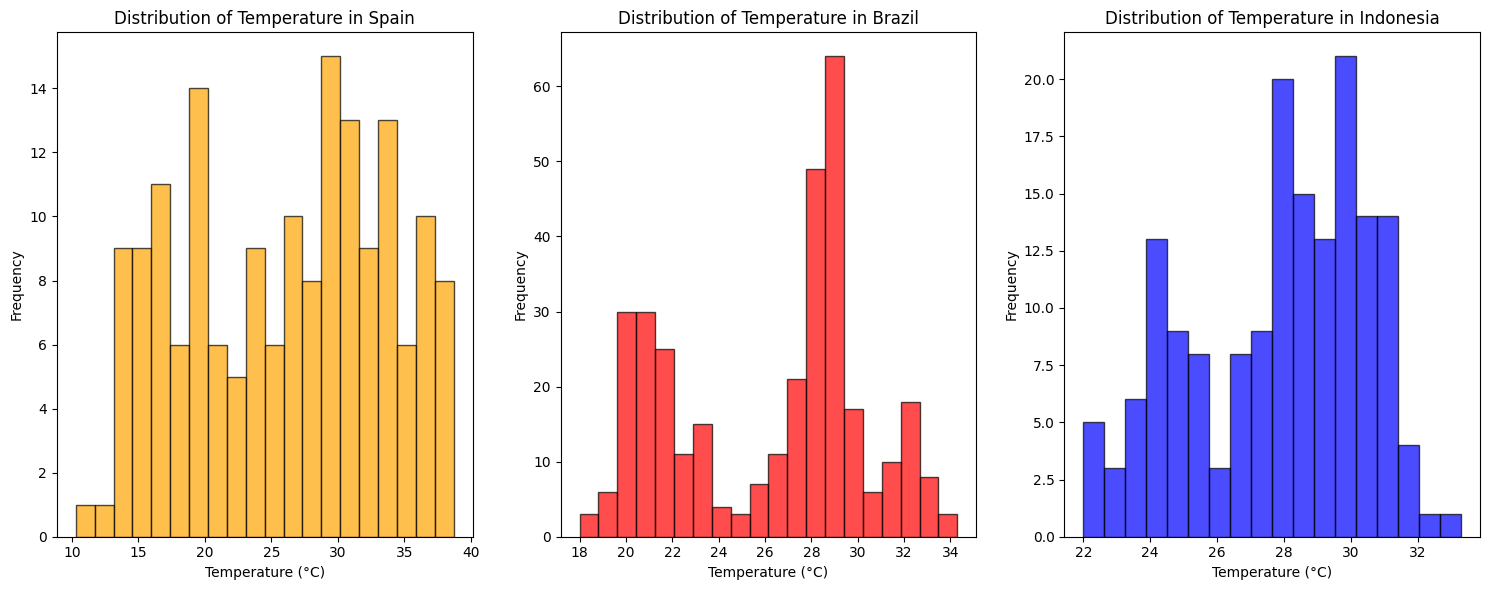

In [30]:
import numpy as np
# Filter out the 18°C temperature for Indonesia
indonesia_df_filtered = indonesia_df[indonesia_df['temperature_celsius'] != 17.9]

# Create a figure with 3 subplots (1 row, 3 columns)
plt.figure(figsize=(15, 6))

# Plot histogram for Spain
plt.subplot(1, 3, 1)  # (rows, columns, position)
plt.hist(spain_df['temperature_celsius'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Temperature in Spain')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Plot histogram for Brazil
plt.subplot(1, 3, 2)  # (rows, columns, position)
plt.hist(brazil_df['temperature_celsius'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Temperature in Brazil')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Plot histogram for Indonesia with adjusted bins
plt.subplot(1, 3, 3)  # (rows, columns, position)

# Define custom bins based on the min and max values in the dataset
bin_edges = np.linspace(indonesia_df_filtered['temperature_celsius'].min(), indonesia_df_filtered['temperature_celsius'].max(), 19)

# Plot the histogram with the custom bin edges
plt.hist(indonesia_df_filtered['temperature_celsius'], bins=bin_edges, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Temperature in Indonesia')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


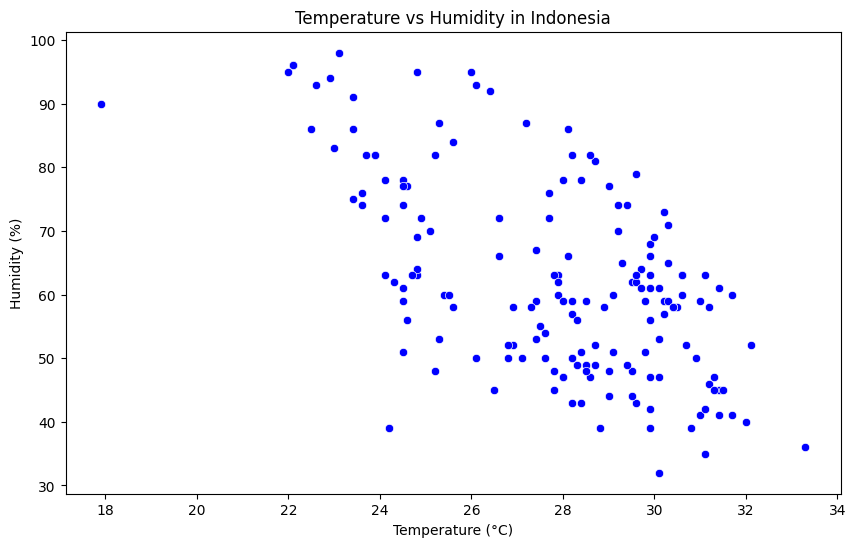

In [33]:
# Scatter plot for temperature vs. humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=indonesia_df['temperature_celsius'], y=indonesia_df['humidity'], color='blue')
plt.title('Temperature vs Humidity in Indonesia')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

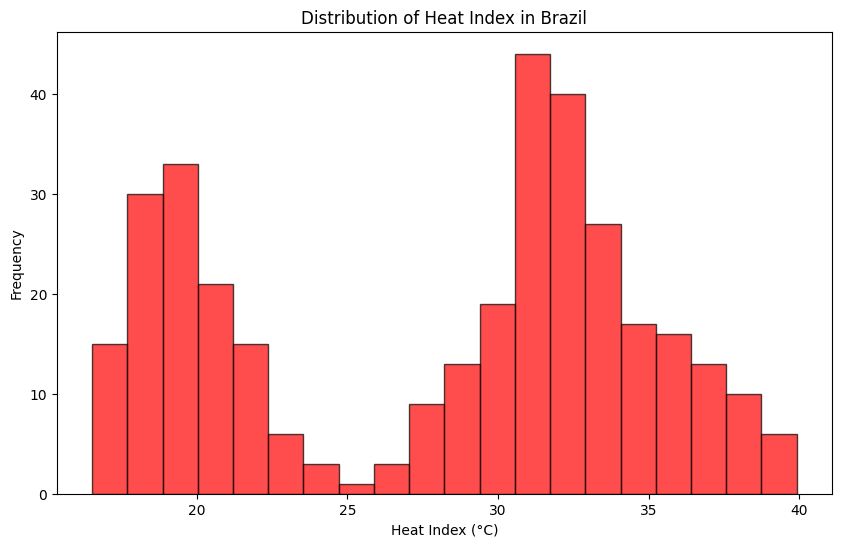

In [38]:
# Function to calculate Heat Index
def calculate_heat_index(temperature_celsius, humidity):
    T = temperature_celsius
    H = humidity
    heat_index = (-8.78469475556 + 1.61139411 * T + 2.33854883889 * H - 0.14611605 * T * H - 
                  0.012308094 * T**2 - 0.0164248277778 * H**2 + 0.002211732 * T**2 * H + 
                  0.00072546 * T * H**2 - 0.000003582 * T**2 * H**2)
    return heat_index

# Apply function to calculate heat index
brazil_df['heat_index'] = brazil_df.apply(lambda row: calculate_heat_index(row['temperature_celsius'], row['humidity']), axis=1)

# Plot heat index distribution using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(brazil_df['heat_index'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Heat Index in Brazil')
plt.xlabel('Heat Index (°C)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()